# Exercício de Casa 🏠 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Parte 1: Preparação do Ambiente**
**Geração de Dados Fictícios:**

In [2]:
# Configurando a seed para reprodutibilidade
np.random.seed(42)

# Gerando dados falsos
categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros', 'Brinquedos']
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
num_registros = len(datas)

# Criando DataFrame
data = {
    'Data': np.random.choice(datas, num_registros),
    'Categoria': np.random.choice(categorias, num_registros),
    'Quantidade_Vendida': np.random.randint(1, 100, num_registros),
    'Preco_Unitario': np.round(np.random.uniform(10, 500, num_registros), 2)
}
df = pd.DataFrame(data)
df['Valor_Total'] = df['Quantidade_Vendida'] * df['Preco_Unitario']

# Salvando o DataFrame em um arquivo CSV
df.to_csv('dados_vendas.csv', index=False)

print("Conjunto de dados gerado e salvo como 'dados_vendas.csv'.")

Conjunto de dados gerado e salvo como 'dados_vendas.csv'.


### **Parte 2: Consulta e Filtragem de Dados**

**Carregar os dados:**

In [14]:
df = pd.read_csv('dados_vendas.csv')
df

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
0,2023-04-13,Roupas,74,60.43,4471.82
1,2023-12-15,Alimentos,83,272.88,22649.04
2,2023-09-28,Roupas,17,195.62,3325.54
3,2023-04-17,Roupas,85,233.93,19884.05
4,2023-03-13,Roupas,78,305.94,23863.32
...,...,...,...,...,...
360,2023-10-07,Brinquedos,66,12.49,824.34
361,2023-04-24,Brinquedos,10,350.90,3509.00
362,2023-10-15,Brinquedos,5,33.90,169.50
363,2023-12-08,Brinquedos,74,270.98,20052.52


**Pergunta 1: Quantas linhas e colunas existem no DataFrame carregado?**

Resposta: O df tem 365 linhas e 5 colunas 

função utilizada para verificar - df.shape

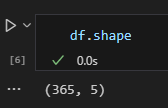


**Pergunta 2: Quais são os tipos de dados (dtypes) das colunas?**

Resposta: Os tipos de dados do df são: object(string), int64(inteiros) e float64(decimais).

função utilizada para verificação - df.dtypes

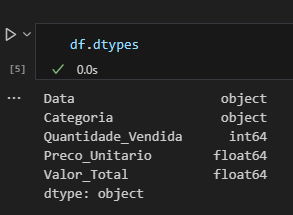


**Exibir as primeiras 5 linhas do DataFrame:**

- A função utilizada é head()  que por padrão mostra apenas as 5 primeiras linhas do df.

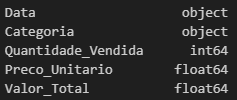

**Pergunta 3: Quantas categorias únicas de produtos estão presentes no DataFrame?**

Resposta: Estão presentes 5 categorias unicas no Dataframe.

função utilizada:

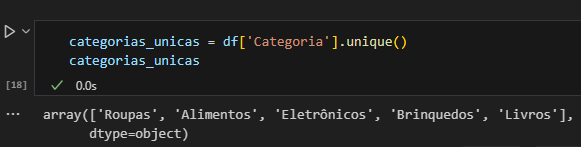

**Filtrar os dados para mostrar apenas as vendas da categoria 'Eletrônicos':**

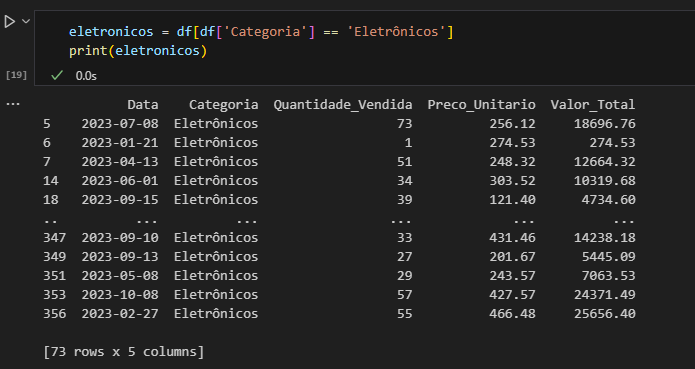

**Pergunta 4: Qual é a média do valor total das vendas na categoria 'Eletrônicos'?**

Resposta: A média total de vendas dos eletrônicos é: 12291.26

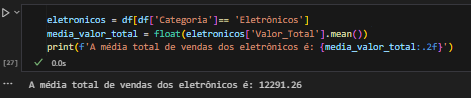


**Filtrar as vendas acima de R$ 1000:**

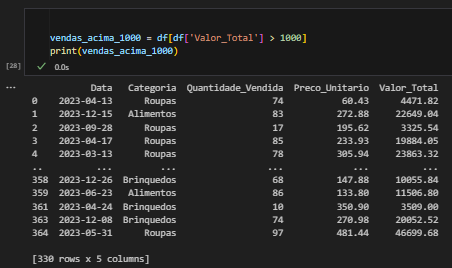

**Pergunta 5: Quantas vendas acima de R$ 1000 ocorreram?**

Resposta: Ocorreram 330 compras acima de 1000.

Função utilizada:

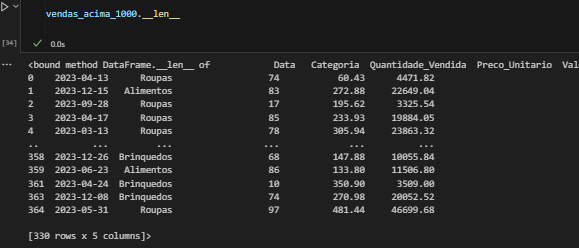



### **Parte 3: Agrupamento e Agregação**



**Agrupar os dados por categoria e calcular o total de vendas por categoria:**

Neste código agrupamos as duas colunas 'Categoria' e 'Valor_Total' para verificarmos o total de vendas por categoria
groupby()- para agrupar, sum() - faz a soma, reset_inex() -para voltar ao índice padrão.

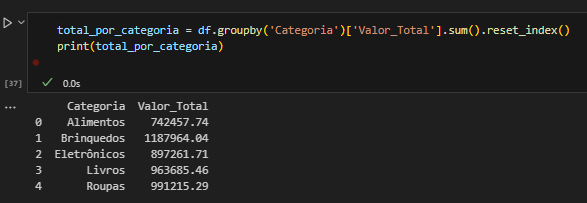




**Pergunta 6: Qual categoria teve o maior valor total de vendas?**

Resposta: a categoria que teve o maior valor de vendas foi "Briquedos"

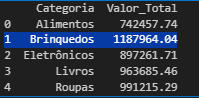



**Calcular a quantidade média vendida por categoria:**

Neste código agrupamos as duas colunas 'Categoria' e 'Quantidade_Vendida' para verificarmos a média vendida por categoria
groupby()- para agrupar, mean() - tira a méida, reset_inex() - para voltar ao índice padrão.

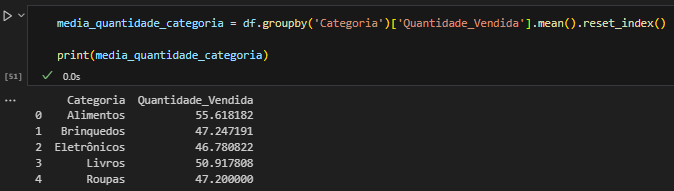
  

**Pergunta 7: Qual categoria teve a maior quantidade média vendida?**

Reposta: Os alimentos tiveram a maior média de vendas.

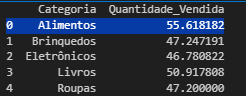

### **Parte 4: Visualização de Dados**


**Criar um gráfico de barras mostrando o total de vendas por categoria:**

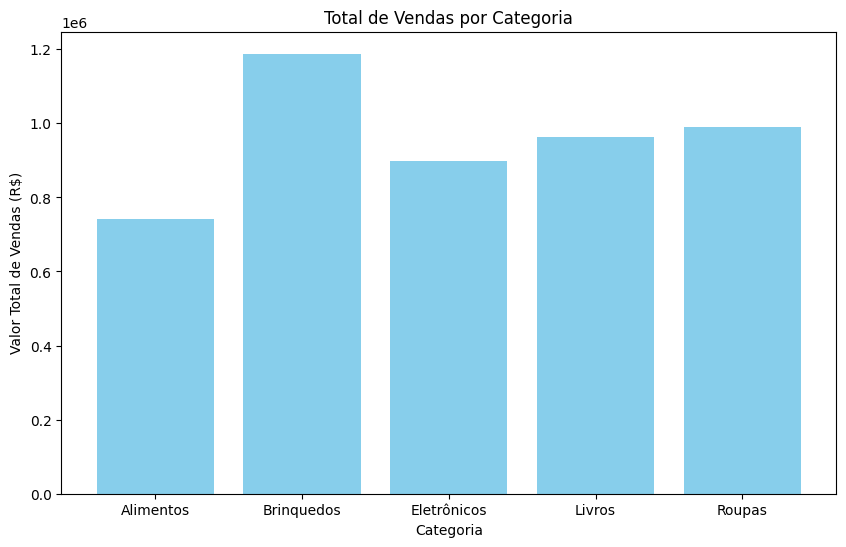

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(total_por_categoria['Categoria'], total_por_categoria['Valor_Total'], color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Total de Vendas por Categoria')
plt.show()

**Pergunta 8: Com base no gráfico, qual categoria visualmente se destaca em termos de vendas totais?**

Resposta: A categora que se destaca é a de brinquedos com o maior número de vendas totais.

**Criar um gráfico de linha mostrando a variação diária das vendas de 'Eletrônicos':**

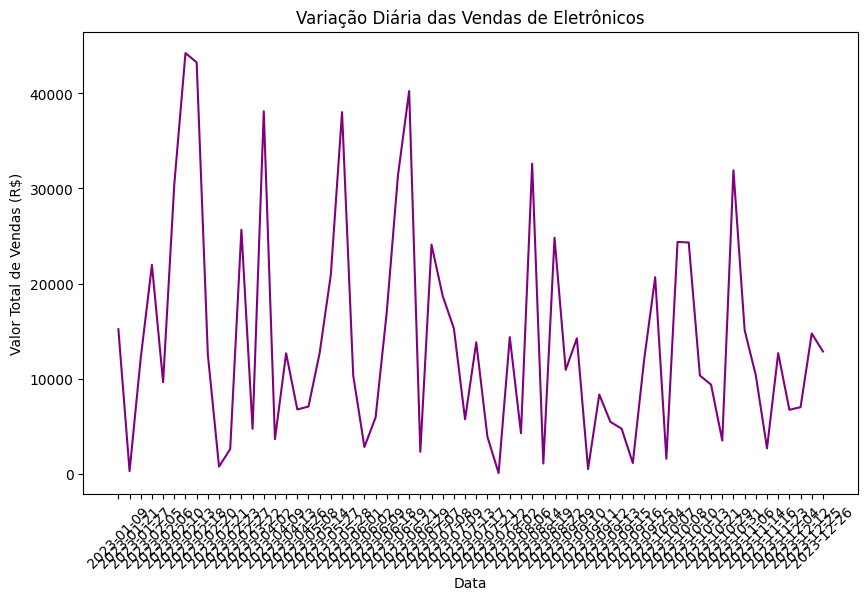

In [53]:
vendas_diarias = eletronicos.groupby('Data')['Valor_Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(vendas_diarias['Data'], vendas_diarias['Valor_Total'], color='purple')
plt.xlabel('Data')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Variação Diária das Vendas de Eletrônicos')
plt.xticks(rotation=45)
plt.show()

**Pergunta 9: Existe algum padrão ou tendência observável nas vendas diárias de eletrônicos?**

Não consegui observar um padrão, mas da para perceber que tem dias que as vendas chegam a triplicar o valor de venda diária, talvez se o gráfico
estivesse por dia da semana ao invés de data poderiamos analisar quais os dias da semana tem o valor menor de vendas e quais tem o valor maior de vendas.